# Welcome to Lab 2

This lab we go hrough some basics of tensors for PyTorch algorithms and then train a deep learning algorithm. 

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.

In [1]:
import torch
import numpy as np

Tensors can be initialized in various ways. Take a look at the following examples:
#### Directly from data

Tensors can be created directly from data. The data type is automatically inferred.



In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


#### From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see Bridge with NumPy).

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#### From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9878, 0.0770],
        [0.0175, 0.2181]]) 



#### With random or constant values:

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [7]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1511, 0.7777, 0.0812],
        [0.9859, 0.8363, 0.0331]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [8]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensively described here.

Each of them can be run on the GPU (at typically higher speeds than on a CPU). 

Standard numpy-like indexing and slicing:


In [9]:

tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Joining tensors 
You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


#### Multiplying tensors

In [11]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### In-place operations
Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

In [12]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


#### Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor


In [15]:

n = np.ones(5)
t = torch.from_numpy(n)


In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### Deep Learning

Hopefully that gave you a bit of an idea of what is possible with tensors. Now let's train a model using tensors. 

Now time for some machine learning!

In [19]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F


First, we need to import the necessary libraries and load the dataset. We will be using the built-in MNIST dataset in PyTorch, which can be easily loaded using the torchvision library. This data set is of handwriten digis and we will be classifying digit is in the image 

In the below code the torchvision.datasets.MNIST function is used to load the dataset, it takes several arguments such as:

    root: The directory where the dataset will be saved. For this workshop we will be saving it to our Service Workbench 'Study' folder. 
    train: A Boolean flag indicating whether to load the training set or the test set.
    transform: A transformation to be applied to the data
    download: A Boolean flag indicating whether to download the dataset if it is not found in the root directory.

In [21]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./studies/Sagemaker_Study/Lab2',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./studies/Sagemaker_Study/Lab2',
                                          train=False,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)


0it [00:00, ?it/s]

Extracting ./studies/Sagemaker_Study/Lab1/MNIST/raw/train-images-idx3-ubyte.gz to ./studies/Sagemaker_Study/Lab1/MNIST/raw


0it [00:00, ?it/s]

Extracting ./studies/Sagemaker_Study/Lab1/MNIST/raw/train-labels-idx1-ubyte.gz to ./studies/Sagemaker_Study/Lab1/MNIST/raw


0it [00:00, ?it/s]

Extracting ./studies/Sagemaker_Study/Lab1/MNIST/raw/t10k-images-idx3-ubyte.gz to ./studies/Sagemaker_Study/Lab1/MNIST/raw


0it [00:00, ?it/s]

Extracting ./studies/Sagemaker_Study/Lab1/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./studies/Sagemaker_Study/Lab1/MNIST/raw
Processing...


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


## Step 3: Build the model
Next, we need to define our model. In this example, we will be using a simple feedforward neural network 


In [22]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
  
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

The Classifier class inherits from PyTorch’s nn.Module class and defines the architecture of the CNN. The __init__ method is called when an instance of the class is created and it sets up the layers of the network.

    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1): This line creates a 2D convolutional layer with 1 input channel, 32 output channels, a kernel size of 3, and padding of 1. The convolutional layer applies a set of filters (also called kernels) to the input image in order to extract features from it.
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1): This line creates another 2D convolutional layer with 32 input channels, 64 output channels, a kernel size of 3, and padding of 1. This layer is connected to the output of the first convolutional layer, allowing the network to learn more complex features from the previous layer’s output.
    self.pool = nn.MaxPool2d(2, 2): This line creates a max pooling layer with a kernel size of 2 and a stride of 2. Max pooling is a down-sampling operation that selects the maximum value from a small neighborhood for each input channel. It helps to reduce the dimensionality of the data, reduce the computational cost and helps to prevent overfitting.
    self.dropout1 = nn.Dropout2d(0.25): This line creates a dropout layer with a probability of 0.25. Dropout is a regularization technique that randomly drops out some neurons during training, which helps to reduce overfitting.
    self.dropout2 = nn.Dropout2d(0.5): This line creates another dropout layer with a probability of 0.5
    self.fc1 = nn.Linear(64 * 7 * 7, 128): This line creates a fully connected (linear) layer with 64 * 7 * 7 input features and 128 output features. Fully connected layers are used to make the final predictions based on the features learned by the previous layers.
    self.fc2 = nn.Linear(128, 10): This line creates another fully connected layer with 128 input features and 10 output features. This layer will produce the final output of the network with 10 classesThe forward method defines the 

Next, there is the Forward pass method of the network. It takes an input x and applies a series of operations defined by the layers in the __init__ method.

    x = self.pool(F.relu(self.conv1(x))): This line applies the ReLU activation function (F.relu) to the output of the first convolutional layer (self.conv1), and then applies max pooling (self.pool) to the result.
    x = self.dropout1(x): This line applies dropout to the output of the first pooling layer.
    x = self.pool(F.relu(self.conv2(x))): This line applies the ReLU activation function to the output of the second convolutional layer (self.conv2), and then applies max pooling to the result.
    x = self.dropout2(x): This line applies dropout to the output of the second pooling layer.
    x = x.view(-1, 64 * 7 * 7): This line reshapes the tensor x to a 1D tensor, with -1 indicating that the number of elements in the tensor is inferred from the other dimensions.
    x = F.relu(self.fc1(x)): This line applies the ReLU activation function to the output of the first fully connected layer (self.fc1).
    x = self.fc2(x): This line applies the final fully connected layer (self.fc2) to the output of the previous layer and returns the result, which will be the final output of the network.
    This CNN architecture is a simple one, and it can be used as a starting point for more complex tasks. However, it could be improved by adding more layers, using different types of layers, or tuning the hyperparameters for better performance.

In [24]:
# Instantiate the model
model = Classifier()
  
# Move the model to the GPU if available
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
         Dropout2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
         MaxPool2d-5             [-1, 64, 7, 7]               0
         Dropout2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 128]         401,536
            Linear-8                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.43
Params size (MB): 1.61
Estimated Total Size (MB): 2.04
----------------------------------------------------------------


## Step 4: Define the loss function and optimizer

Now, we need to define a loss function and an optimizer. For this example, we will be using the cross-entropy loss and the  ADAM  optimizer.

In [25]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

The code defines the loss function and optimizer for the neural network.

nn.CrossEntropyLoss() is a PyTorch function that creates an instance of the cross-entropy loss function. Cross-entropy loss is commonly used in classification problems as it measures the dissimilarity between the predicted class probabilities and the true class. It is calculated by taking the negative logarithm of the predicted class probability for the true class.

optimizer = optim.Adam(model.parameters(), lr=0.001): This line creates an instance of the optim.Adam class, which is an optimization algorithm commonly used for deep learning. The Adam optimizer is an extension of stochastic gradient descent that uses moving averages of the parameters to provide a running estimate of the second raw moments of the gradients; the term Adam is derived from adaptive moment estimation. It requires the model’s parameters to be passed as the first argument and the learning rate is set to 0.001. The learning rate is a hyperparameter that controls the step size at which the optimizer makes updates to the model’s parameters.

The optimizer and the loss function are used during the training process to update the model’s parameters and to evaluate the model’s performance, respectively.

## Step 5: Train the model

Now, we can train our model using the training dataset. We will be using a batch size of 100 and will train the model for 10 epochs. The below code is training the neural network on a dataset using a loop that iterates over the number of training epochs and over the data in the training dataset.

    batch_size = 100 and num_epochs = 10 define the batch size and number of epochs for the training process. The batch size is the number of samples from the training dataset that are used in one forward and backward pass of the neural network. The number of epochs is the number of times the entire training dataset is passed through the network.
    
    torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) creates a PyTorch DataLoader for the training dataset. The DataLoader takes the training dataset as an input and returns an iterator over the dataset. The iterator will return a set of samples (images and labels) in each iteration, where the number of samples is determined by the batch size. By setting shuffle=True, the DataLoader will randomly shuffle the dataset before each epoch.
    
    The outer loop, for epoch in range(num_epochs), iterates over the number of training epochs.
    
    The inner loop, for i, (images, labels) in enumerate(train_loader), iterates over the DataLoader, which returns batches of images and labels. The images are passed through the model using outputs = model(images) to get the model’s predictions.
    
    The loss is calculated by passing the model’s predictions and the true labels to the loss function using loss = criterion(outputs, labels).
    
    The optimizer is used to update the model’s parameters in the direction that minimizes the loss. This is done in the following 3 steps:  
        optimizer.zero_grad() which clears the gradients of all optimizable parameters.
        loss.backward() computes the gradients of the loss with respect to the model’s parameters.
        optimizer.step() updates the model’s parameters based on the computed gradients.
    
    After the end of each epoch, the code prints the current epoch and the loss at the end of the epoch.

At the end of the training process, the model’s parameters will have been updated to minimize the loss on the training dataset.

It’s worth noting that it’s also useful to use a validation set to evaluate the model performance during training, so we can detect overfitting and adjust the model accordingly. we can achieve this by splitting the training set into two parts: training and validation. Then, use the training set for training, and use the validation set for evaluating the model performance during training.

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [29]:
batch_size=100
num_epochs=10
# Split the training set into training and validation sets
val_percent = 0.2 # percentage of the data used for validation
val_size    = int(val_percent * len(train_dataset))
train_size  = len(train_dataset) - val_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, 
                                                           [train_size, 
                                                            val_size])
  
# Create DataLoaders for the training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=batch_size, 
                                         shuffle=False,
                                         pin_memory=True)
losses = []
accuracies = []
val_losses = []
val_accuracies = []
# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        images=images.to(device)
        labels=labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
          
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
        _, predicted = torch.max(outputs.data, 1)
    acc = (predicted == labels).sum().item() / labels.size(0)
    accuracies.append(acc)
    losses.append(loss.item())  
          
    # Evaluate the model on the validation set
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            labels=labels.to(device)
            images=images.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
              
            _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        val_acc += correct / total
        val_accuracies.append(acc)
        val_losses.append(loss.item())  
      
              
    print('Epoch [{}/{}],Loss:{:.4f},Validation Loss:{:.4f},Accuracy:{:.2f},Validation Accuracy:{:.2f}'.format(
        epoch+1, num_epochs, loss.item(), val_loss, acc ,val_acc))

Epoch [1/10],Loss:0.1695,Validation Loss:13.6400,Accuracy:0.92,Validation Accuracy:0.94
Epoch [2/10],Loss:0.1333,Validation Loss:9.4631,Accuracy:0.94,Validation Accuracy:0.97
Epoch [3/10],Loss:0.1130,Validation Loss:7.5986,Accuracy:0.98,Validation Accuracy:0.96
Epoch [4/10],Loss:0.0770,Validation Loss:6.8898,Accuracy:1.00,Validation Accuracy:0.97
Epoch [5/10],Loss:0.0435,Validation Loss:6.2894,Accuracy:0.97,Validation Accuracy:0.97
Epoch [6/10],Loss:0.1514,Validation Loss:6.1212,Accuracy:0.98,Validation Accuracy:0.94
Epoch [7/10],Loss:0.0477,Validation Loss:6.0212,Accuracy:0.98,Validation Accuracy:0.97
Epoch [8/10],Loss:0.0371,Validation Loss:5.3425,Accuracy:0.99,Validation Accuracy:0.99
Epoch [9/10],Loss:0.0520,Validation Loss:5.0447,Accuracy:0.97,Validation Accuracy:0.97
Epoch [10/10],Loss:0.1500,Validation Loss:5.4025,Accuracy:1.00,Validation Accuracy:0.96


## Step 6: Plot Training and Validation curve to check overfitting or underfitting

Once the model is trained, We can plot the Training and Validation Loss and accuracy curve. This can give us an idea of how the model is performing on unseen data, and if it’s overfitting or underfitting.

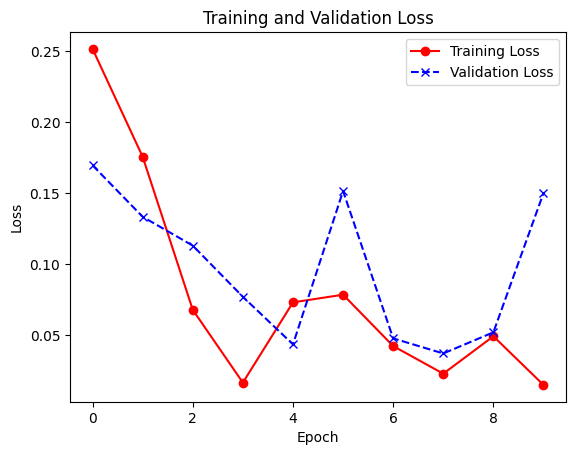

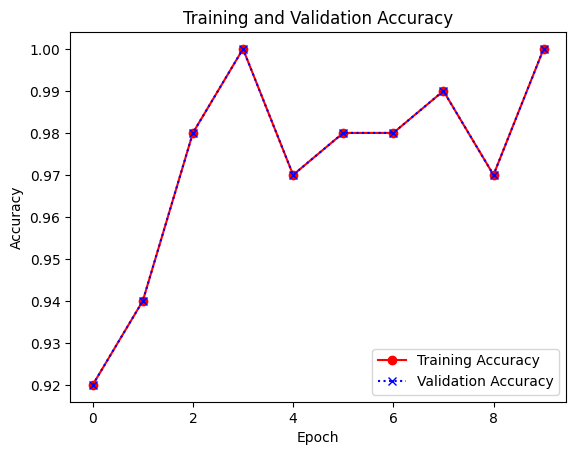

In [32]:
import matplotlib.pyplot as plt
  
# Plot the training and validation loss over time
plt.plot(range(num_epochs), 
         losses, color='red', 
         label='Training Loss',
         marker='o')
plt.plot(range(num_epochs), 
         val_losses,
         color='blue', 
         linestyle='--', 
         label='Validation Loss', 
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
  
# Plot the training and validation accuracy over time
plt.plot(range(num_epochs), 
         accuracies, 
         label='Training Accuracy', 
         color='red', 
         marker='o')
plt.plot(range(num_epochs), 
         val_accuracies, 
         label='Validation Accuracy', 
         color='blue', 
         linestyle=':', 
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Step 7: Evaluation

Another important aspect is the choice of the evaluation metric. In this example, we used accuracy as the evaluation metric, which is a good starting point for many problems. However, it’s important to be aware that accuracy can be misleading in some cases, especially when the classes are imbalanced. In those cases, other metrics such as precision, recall, F1-score, or AUC-ROC should be used.

After training the model, you can evaluate its performance on the test dataset by making predictions and comparing them to the true labels. One way to evaluate the performance of a classification model is to use a classification report, which is a summary of the model’s performance across all classes.

The first thing is to evaluate the model on the test dataset and calculate its overall accuracy by comparing the predicted labels to the true labels using the torch.max() function.

Then, it generates a classification report using the classification_report function from the scikit-learn library. The classification report gives you a summary of the model’s performance across all classes by calculating several metrics such as precision, recall, f1-score, and support.

Precision – Precision is the number of true positives divided by the number of true positives plus the number of false positives. It is a measure of how many of the positive predictions were correct.

Recall – Recall is the number of true positives divided by the number of true positives plus the number of false negatives. It is a measure of how many of the actual positive cases were correctly predicted.

F1-score – The F1-score is the harmonic mean of precision and recall. It is a single number that represents the balance between precision and recall.

Support – Support is the number of instances in the test set that belong to a specific class.

It is important to note that the classification report is calculated based on the predictions made on the entire test set, and not just a sample of the test set.

Here is an example of how to evaluate the model and generate a classification report:

In [33]:
# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
  
# Evaluate the model on the test dataset
model.eval()
  
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted=predicted.to('cpu')
        labels=labels.to('cpu')
        y_true.extend(labels)
        y_pred.extend(predicted)

print('Test Accuracy: {}%'.format(100 * correct / total))
  
# Generate a classification report
  
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Test Accuracy: 99.09%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Finally, it’s important to keep in mind that deep learning models require a lot of data and computational resources to train. Training a model on a large dataset might take a long time and require a powerful GPU. 